# 2次遅れ系のインパルス応答
2次遅れ系
$$
G(s) = \frac{K \omega_{n}^{2}}{s^{2} + 2 \zeta \omega_{n} s + \omega_{n}^{2}} \tag{1}
$$
のインパルス応答をラプラス逆変換によって求めると，減衰係数$\zeta$の値によって3通りの式を得る。
$$
g(t) = \mathcal{L}^{-1} [G(s)] = \left \{
\begin{array}{ll}
g_{1}(t) = \displaystyle K \omega_{n} e^{-\zeta \omega_{n} t} \frac{\sin \sqrt{1 - \zeta^{2}} \omega_{n} t}{\sqrt{1 - \zeta^{2}}}   & (\zeta < 1) \\[5pt]
g_{2}(t) = \displaystyle K \omega_{n}^{2} t e^{-\omega_n t} & (\zeta = 1) \\[5pt]
g_{3}(t) = \displaystyle K \omega_{n} e^{-\zeta \omega_{n} t} \frac{\sinh \sqrt{\zeta^{2} - 1} \omega_{n} t}{\sqrt{\zeta^{2} - 1}} & (\zeta > 1)
\end{array}
\right. \tag{2} 
$$
ここで，(2)式のそれぞれを上から$g_{1}(t)$, $g_{2}(t)$, $g_{3}(t)$とする。
このとき，$\zeta$の変化に伴ってインパルス応答の波形は連続的に変化するため，
$$
\lim_{\zeta \to 1^{-}} g_{1} (t) = g_{2} (t), \quad \lim_{\zeta \to 1^{+}} g_{3} (t) = g_{2} (t) \tag{3}
$$
が成立する。これらの極限の計算には，
$$
\lim_{x \to 0} \frac{\sin \alpha x}{x} = \alpha, \quad \lim_{x \to 0} \frac{\sinh \beta x}{x} = \beta \tag{4}
$$
がそれぞれ活用できる。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

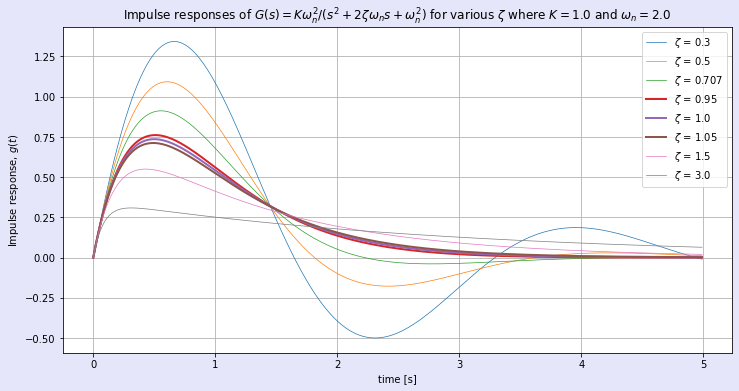

In [2]:
# インパルス応答
def g(K, omega_n, zeta, t):
    if zeta < 1.0:
        return K * omega_n / np.sqrt(1 - zeta**2) * np.exp(-zeta * omega_n * t) \
            * np.sin(np.sqrt(1 - zeta**2) * omega_n * t)
    elif zeta == 1.0:
        return K * omega_n**2 * t * np.exp(-omega_n * t)
    elif zeta > 1.0:
        #return K * omega_n / (2 * np.sqrt(zeta**2 - 1)) \
        #    * (np.exp(-(zeta - np.sqrt(zeta**2 - 1)) * omega_n * t) - np.exp(-(zeta + np.sqrt(zeta**2 - 1)) * omega_n * t))
        return K * omega_n / np.sqrt(zeta**2 - 1) * np.exp(-zeta * omega_n * t) \
            * np.sinh(np.sqrt(zeta**2 - 1) * omega_n * t)

# 時間ベクトル
t = np.arange(0, 5, 0.01)

# パラメータ
K = 1.0
omega_n = 2.0
zetas = np.array([0.3, 0.5, 0.707, 0.95, 1.00, 1.05, 1.5, 3.0])

# プロット準備
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
fig.patch.set_facecolor('lavender')

# プロット
for zeta in zetas:
    y = g(K, omega_n, zeta, t)
    lw = 2 if 0.9 <= zeta <= 1.1 else 0.7
    ax.plot(t, y, label = f'$\zeta$ = {zeta}', lw = lw)

# グラフ設定
ax.set_title(f'Impulse responses of $G(s) = K \omega_n^2 / (s^2 + 2 \zeta \omega_n s + \omega_n^2)$ for various $\zeta$ where $K = {K}$ and $\omega_n = {omega_n}$')
ax.set_xlabel('time [s]')
ax.set_ylabel('Impulse response, $g(t)$')
ax.legend()
ax.grid()